In [8]:
from easyAI import TwoPlayersGame, Human_Player, AI_Player, Negamax
import numpy as np

In [14]:
!pip install gym



  Created wheel for gym: filename=gym-0.17.2-py3-none-any.whl size=1650896 sha256=e2db2948b2f441328514738df7457d8722c51a933480792ac3c2255d4c199919
  Stored in directory: c:\users\edison\appdata\local\pip\cache\wheels\18\e1\58\89a2aa24e6c2cc800204fc02010612afdf200926c4d6bfe315
Successfully built gym


In [6]:
class TresEnRaya(TwoPlayersGame):
    
    def __init__(self,nplayers):
        self.tablero = np.zeros((3,3),dtype = int)
        self.nplayer = 1
        self.mapa = {}
        cont = 1
        for i in range(len(self.tablero)):
            for j in range(len(self.tablero)):
                self.mapa[cont]=(i,j)
                cont+=1
                
        #print(self.mapa)
        self.players = nplayers
        

    def possible_moves(self):
        moves = []
        cont = 1
        for i in range(len(self.tablero)):
            for j in range(len(self.tablero)):
                if self.tablero[i][j] == 0:
                    moves.append(cont)
                cont+=1
                
        #print(moves)
        return moves
    
    def make_move(self,casillero):
        pos = self.mapa[casillero]
        self.tablero[pos[0]][pos[1]] = self.nplayer
        
    def unmake_move(self,casillero):
        pos = self.mapa[casillero]
        self.tablero[pos[0]][pos[1]] = 0
        
    def lose(self):
        for i in range(len(self.tablero)):
            if np.all(self.tablero[i,:]==self.nopponent,axis = 0) or np.all(self.tablero[:,i]==self.nopponent,axis = 0):
                return True
        
        
        if self.tablero[0][0]==self.nopponent and self.tablero[1][1]==self.nopponent and self.tablero[2][2]==self.nopponent:
            return True
        
        if self.tablero[2][0]==self.nopponent and self.tablero[1][1]==self.nopponent and self.tablero[0][2]==self.nopponent:
            return True
        
        return False
    
    
    def show(self):
        print(self.tablero)
        
        
    def scoring(self):
        return -100 if self.lose() else 0

        
    def is_over(self):
        return (self.possible_moves() == [] or self.lose())
            
    
if __name__=="__main__":
    ai_algo = Negamax(6)
    tresenraya = TresEnRaya([Human_Player(),AI_Player(ai_algo)])
    tresenraya.play()

[[0 0 0]
 [0 0 0]
 [0 0 0]]

Player 1 what do you play ? 2

Move #1: player 1 plays 2 :
[[0 1 0]
 [0 0 0]
 [0 0 0]]

Move #2: player 2 plays 1 :
[[2 1 0]
 [0 0 0]
 [0 0 0]]

Player 1 what do you play ? 6

Move #3: player 1 plays 6 :
[[2 1 0]
 [0 0 1]
 [0 0 0]]

Move #4: player 2 plays 7 :
[[2 1 0]
 [0 0 1]
 [2 0 0]]

Player 1 what do you play ? 4

Move #5: player 1 plays 4 :
[[2 1 0]
 [1 0 1]
 [2 0 0]]

Move #6: player 2 plays 5 :
[[2 1 0]
 [1 2 1]
 [2 0 0]]

Player 1 what do you play ? 3

Move #7: player 1 plays 3 :
[[2 1 1]
 [1 2 1]
 [2 0 0]]

Move #8: player 2 plays 9 :
[[2 1 1]
 [1 2 1]
 [2 0 2]]


## Version grafica del 3 en ralla

In [10]:
from easyAI import TwoPlayersGame, Human_Player, AI_Player, Negamax
from flask import Flask, render_template_string, request, make_response


class TicTacToe(TwoPlayersGame):
    """ The board positions are numbered as follows:
            7 8 9
            4 5 6
            1 2 3
    """

    def __init__(self, players):
        self.players = players
        self.board = [0 for i in range(9)]
        self.nplayer = 1  # player 1 starts.

    def possible_moves(self):
        return [i + 1 for i, e in enumerate(self.board) if e == 0]

    def make_move(self, move):
        self.board[int(move) - 1] = self.nplayer

    def unmake_move(self, move):  # optional method (speeds up the AI)
        self.board[int(move) - 1] = 0

    WIN_LINES = [
        [1, 2, 3], [4, 5, 6], [7, 8, 9],  # horiz.
        [1, 4, 7], [2, 5, 8], [3, 6, 9],  # vertical
        [1, 5, 9], [3, 5, 7]  # diagonal
    ]

    def lose(self, who=None):
        """ Has the opponent "three in line ?" """
        if who is None:
            who = self.nopponent
        wins = [all(
            [(self.board[c - 1] == who) for c in line]
        ) for line in self.WIN_LINES]
        return any(wins)

    def is_over(self):
        return (self.possible_moves() == []) or self.lose() or \
            self.lose(who=self.nplayer)

    def show(self):
        print ('\n' + '\n'.join([
            ' '.join(
                [['.', 'O', 'X'][self.board[3 * j + i]] for i in range(3)]
            )
            for j in range(3)
        ]))

    def spot_string(self, i, j):
        return ["_", "O", "X"][self.board[3 * j + i]]

    def scoring(self):
        opp_won = self.lose()
        i_won = self.lose(who=self.nplayer)
        if opp_won and not i_won:
            return -100
        if i_won and not opp_won:
            return 100
        return 0

    def winner(self):
        if self.lose(who=2):
            return "AI Wins"
        return "Tie"


TEXT = '''
<!doctype html>
<html>
  <head><title>3 en ralla</title></head>
  <body>
    <h1>3 en ralla</h1>
    <h2>{{msg}}</h2>
    <form action="" method="POST">
      <table>
        {% for j in range(2, -1, -1) %}
        <tr>
          {% for i in range(0, 3) %}
          <td>
            <button type="submit" name="choice" value="{{j*3+i+1}}"
             {{"disabled" if ttt.spot_string(i, j)!="_"}}>
              {{ttt.spot_string(i, j)}}
            </button>
          </td>
          {% endfor %}
        </tr>
        {% endfor %}
      </table>
      <button type="submit" name="reset">Start Over</button>
    </form>
  </body>
</html>
'''

app = Flask(__name__)
ai_algo = Negamax(6)


@app.route("/", methods=['GET', 'POST'])
def play_game():
    ttt = TicTacToe([Human_Player(), AI_Player(ai_algo)])
    game_cookie = request.cookies.get('game_board')
    if game_cookie:
        ttt.board = [int(x) for x in game_cookie.split(",")]
    if "choice" in request.form:
        ttt.play_move(request.form["choice"])
        if not ttt.is_over():
            ai_move = ttt.get_move()
            ttt.play_move(ai_move)
    if "reset" in request.form:
        ttt.board = [0 for i in range(9)]
    if ttt.is_over():
        msg = ttt.winner()
    else:
        msg = "play move"
    resp = make_response(render_template_string(TEXT, ttt=ttt, msg=msg))
    c = ",".join(map(str, ttt.board))
    resp.set_cookie("game_board", c)
    return resp


if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Jul/2020 13:47:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:24] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:25] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:27] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:28] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:35] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:36] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:38] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:41] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:46] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:48] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:51] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:53] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:54] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 13:47:57] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020

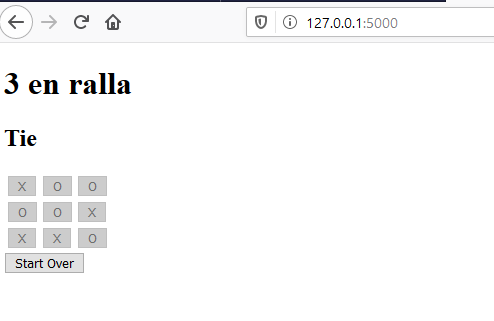

## Juego egemplo 

In [1]:
import pygame
import gym
import random
width=360
height=480
fps=30
white=(255,255,255)
black=(0,0,0)
red=(255,0,0)
green=(0,255,0)
blue=(0,0,255)


class player1(pygame.sprite.Sprite): 
    def __init__(self,x,y):
        pygame.sprite.Sprite.__init__(self)
        self.image=pygame.Surface((50,10))
        self.image.fill(green)
        self.image.set_colorkey(black)
        self.rect=self.image.get_rect()
        self.rect.centerx=x
        self.rect.bottom=y
        
    def update(self):
        self.speedx=0
        keystate=pygame.key.get_pressed()
        if keystate[pygame.K_LEFT]:
            self.speedx=-5
        if keystate[pygame.K_RIGHT]:
            self.speedx=5
        if self.rect.right>width:
            self.rect.right=width  
        if self.rect.right<0:
            self.rect.left=0
        self.rect.x+=self.speedx
        
class player2(pygame.sprite.Sprite):
    def __init__(self,x,y):
        pygame.sprite.Sprite.__init__(self)
        self.image=pygame.Surface((50,10))
        self.image.fill(green)
        self.image.set_colorkey(black)
        self.rect=self.image.get_rect()
        self.rect.centerx=x
        self.rect.bottom=y+10
        
    def update(self):
        self.speedx=0
        keystate=pygame.key.get_pressed()
        if keystate[pygame.K_a]:
            self.speedx=-5
        if keystate[pygame.K_d]:
            self.speedx=5
        if self.rect.right>width:
            self.rect.right=width
        if self.rect.right<0:
            self.rect.left=0
        self.rect.x+=self.speedx
class Ball(pygame.sprite.Sprite):
    def __init__(self):
        pygame.sprite.Sprite.__init__(self)
        self.image=pygame.Surface((20,20))
        self.image.fill(white)
        self.image.set_colorkey(black)
        self.rect=self.image.get_rect()
        self.rect.centerx=width/3
        self.rect.bottom=height/2
        self.speedy=5
        self.speedx=0
    def update(self):
        self.rect.bottom+=self.speedy
        self.rect.centerx+=self.speedx
        if self.rect.bottom>height:
            self.speedy=-5
        if self.rect.top<0:
            self.speedy=5
        if self.rect.right>width or self.rect.centerx<-10:
            self.speedx=-self.speedx    
    def deflect1(self,other):
        if self.rect.bottom<475:
            r=other.rect.centerx
            self.speedx=5*(180-r)/100 +random.randrange(-1,1)
            self.speedy=-self.speedy
    def deflect2(self,other):
        if self.rect.bottom>5:
            r=other.rect.centerx
            self.speedx=(-5)*(r-180)/100+random.randrange(-1,1)
            self.speedy=-self.speedy
        pygame.init()
pygame.mixer.init()
screen=pygame.display.set_mode((width,height))
pygame.display.set_caption("PONG")
clock=pygame.time.Clock()
all_sprites=pygame.sprite.Group() 
balls=pygame.sprite.Group()
goodplayer=player1(0,480)
badplayer=player2(100,0)
ball=Ball()
all_sprites.add(goodplayer)
all_sprites.add(badplayer)
all_sprites.add(ball)
balls.add(ball)
running = True
count1=0
count2=0
while running:
    clock.tick(fps)
    for event in pygame.event.get():
        if event.type==pygame.QUIT:
            running=False
    all_sprites.update()
    hits1=pygame.sprite.spritecollide(goodplayer,balls,False)
    hits2=pygame.sprite.spritecollide(badplayer,balls,False)
    if hits1:
        ball.deflect1(goodplayer)
        count1+=1
    if hits2:
        ball.deflect2(badplayer)
        count2+=1
    if count1>count2+1000 or count2>count1+1000:
        running=False
    screen.fill(black)
    all_sprites.draw(screen)
    pygame.display.flip()  
pygame.quit



pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


<function pygame.base.quit>

## resultado
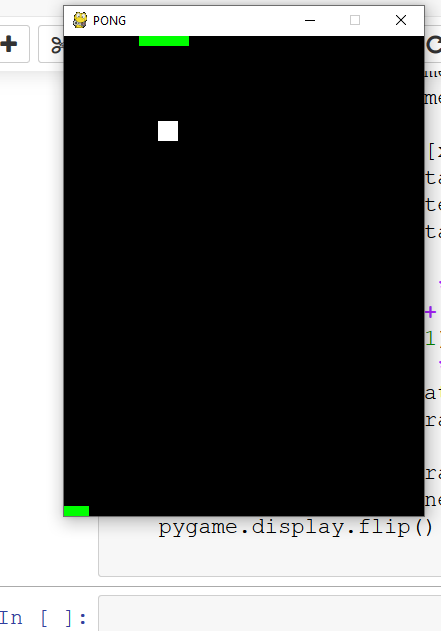

## ejemplo 2

In [ ]:
import pygame
import numpy as np
import time

pygame.init()

width, height = 1000, 1000
screen = pygame.display.set_mode((height, width))

bg = 25, 25, 25

screen.fill(bg)

nxC, nyC = 50, 50

dimCW = width / nxC
dimCH = height / nyC

gameState = np.zeros((nxC, nyC))
gameState[5, 3] = 1
gameState[5, 4] = 1
gameState[5, 5] = 1

gameState[21, 21] = 1
gameState[22, 22] = 1
gameState[22, 23] = 1
gameState[21, 23] = 1
gameState[20, 23] = 1
while True:
    newGameState = np.copy(gameState)
    screen.fill(bg)
    time.sleep(0.1)
    for y in range(0, nxC):
        for x in range(0, nyC):
            n_neigh = gameState[(x - 1) % nxC, (y - 1) % nyC] + \
                      gameState[(x) % nxC, (y - 1) % nyC] + \
                      gameState[(x + 1) % nxC, (y - 1) % nyC] + \
                      gameState[(x - 1) % nxC, (y) % nyC] + \
                      gameState[(x + 1) % nxC, (y) % nyC] + \
                      gameState[(x - 1) % nxC, (y + 1) % nyC] + \
                      gameState[(x) % nxC, (y + 1) % nyC] + \
                      gameState[(x + 1) % nxC, (y + 1) % nyC]

            if gameState[x, y] == 0 and n_neigh == 3:
                newGameState[x, y] = 1
            elif gameState[x, y] == 1 and (n_neigh < 2 or n_neigh > 3):
                newGameState[x, y] = 0

            poly = [((x) * dimCW, y * dimCH),
                    ((x + 1) * dimCW, y * dimCH),
                    ((x+1) * dimCW, (y+1) * dimCH),
                    ((x) * dimCW, (y+1) * dimCH)]
            if newGameState[x, y] == 0:
                pygame.draw.polygon(screen, (128, 128, 128), poly, 1)
            else:
                pygame.draw.polygon(screen, (255, 255, 255), poly, 0)
    gameState = np.copy(newGameState)
    pygame.display.flip()


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


## resultado
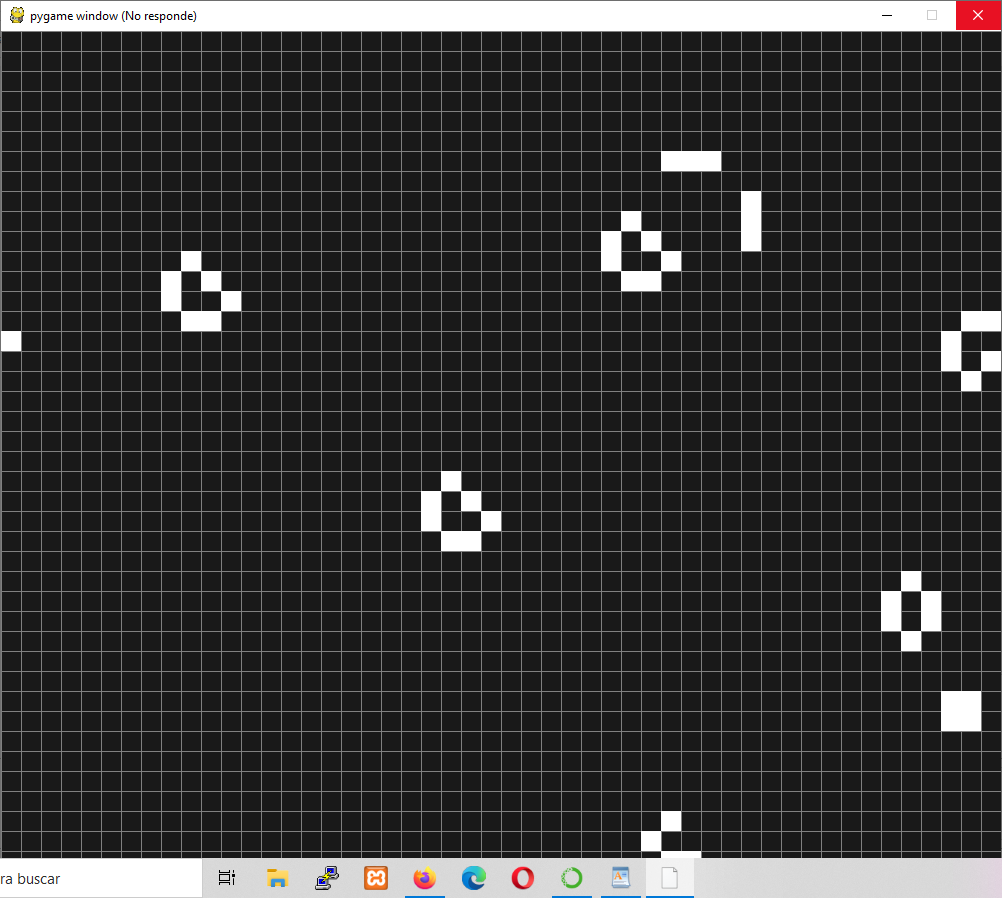
